In [1]:
import glob
import pandas as pd
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# INPUTS
input_dir = '/home/fadh/projects/biomineralization/resurface_EDA_validated_DHRs/workspace_with_pylesh/sampling'
input_file = 'merged_output.tsv'
input_full_path = os.path.join(input_dir, input_file)

In [3]:
# READ DATAFRAME FROM INPUT
df = pd.read_csv(input_full_path, sep='\t')
df

,SCORE:,total_score,score,BetaNov16,SAP_resnorm,SASA_resnorm,aa_composition,approximate_buried_unsat_penalty,arg_cation_pi,atom_pair_constraint,coordinate_constraint,dihedral_constraint,dslf_fa13,fa_atr,fa_dun_dev,fa_dun_rot,fa_dun_semi,fa_elec,fa_intra_atr_xover4,fa_intra_elec,fa_intra_rep_xover4,fa_intra_sol_xover4,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hxl_tors,hydrophobicSASA_resnorm,lk_ball,lk_ball_bridge,lk_ball_bridge_uncpl,lk_ball_iso,omega,p_aa_pp,polarSASA_resnorm,pro_close,radius,rama_prepro,ref,rise,sap_score,score_resnorm,time,tot_Rscore,total_hydrophobic_sasa,total_polar_sasa,total_sasa,charge_pH_7,isoelectric_point,GRAVY_value,mean_seq_diff,scaffold,aa_comp,description,sequence
0,SCORE:,-187.885,-160.972,-370.972,0.147,58.053,0.000,210.0,0.000,0.0,0.0,0.0,0.0,-1149.161,18.097,159.414,125.998,-402.366,-66.408,-32.208,30.321,49.662,138.059,941.160,-6.752,-7.128,-11.258,-165.772,17.617,28.252,537.669,-0.431,-3.514,-521.942,0.196,-28.944,29.801,0.079,53.696,31.477,-51.751,4.858,29.496,-1.855,2419.0,-370.972,5650.358,5960.246,11610.604,24.5384,10.1391,-0.7075,31.6923,DHR71_5CWN_XtalFit_4x,Pos90,DHR71_5CWN_XtalFit_4x_Pos90_surfB_repeat_thread1_0005,MDPEEILERAKESLERAREASERGDEKEFRKAAKKALTLAKKLVKQAKREGDPELVLEAAKVALRVAELAAKNGDKKVFRKAAKSALTVAKKLVKVASREGDPELVLEAAKVALRVAELAAKNGDKKVFRKAAKSALTVAKKLVKVASREGDPELVEEAAKVAEEVRKLAKKQGDEKVYRKARKTARTVKKKLKKVRERK
1,SCORE:,-183.694,-156.781,-366.781,0.153,58.159,0.000,210.0,0.000,0.0,0.0,0.0,0.0,-1137.332,17.172,161.048,127.941,-400.257,-65.967,-33.409,30.460,50.637,137.609,931.113,-7.040,-7.128,-13.000,-165.772,15.594,28.719,536.796,-0.414,-3.347,-517.561,0.196,-28.531,29.440,0.080,53.696,29.750,-52.331,4.858,30.511,-1.834,1985.0,-366.781,5743.782,5888.029,11631.811,24.5345,10.0519,-0.6975,32.0000,DHR71_5CWN_XtalFit_4x,Pos90,DHR71_5CWN_XtalFit_4x_Pos90_surfB_repeat_thread2_0004,MDPEEILERAKESLERAREASERGDEKEFRKAAKKALKLASKLVKQAKKEGDPELVLEAAKVALRVAELAAKNGDKKVFRKAAKSALKVASKLVKVASKEGDPELVLEAAKVALRVAELAAKNGDKKVFRKAAKSALKVASKLVKVASKEGDPELVEEAAKVAEEVRKLAKKQGDEKVYRKARKTARKVKSKLKKVREKK
2,SCORE:,214.323,241.126,-473.874,0.401,47.531,550.000,165.0,0.000,0.0,0.0,0.0,0.0,-1377.679,17.015,102.242,210.085,-478.277,-70.935,-76.822,36.538,59.256,184.942,1088.529,-0.251,0.000,-15.857,-230.147,10.819,25.643,632.150,-1.577,-10.896,-629.433,0.360,-31.086,21.888,1.217,2.610,50.749,28.382,8.858,96.179,-1.974,1708.0,-473.874,6154.310,5253.021,11407.331,-23.5136,4.6955,-0.1029,40.6667,DHR18_5CWI_XtalFit_4x,NegGre45,DHR18_5CWI_XtalFit_4x_NegGre45_surfB_repeat_thread2_0002,DIEKLCKKAESEAREARSKAEELRQRHPDSEAAVLAQELAEAAEEAVWLACLLAELHPNADIAKLCIKAASEAAEAASKAAELAQRHPDSEAAVLAIELAEAAAEAVWLACLLAELHPNADIAKLCIKAASEAAEAASKAAELAQRHPDSEAAVLAIELAEAAAEAVWLACLLAELHPNADIAKKCIKAASEAAEEASKAAEEAQRHPDSEKAVLEIEEAEAKAEEVWLRCLRAELHPNA
3,SCORE:,214.383,241.221,-468.779,0.347,46.509,550.000,160.0,0.000,0.0,0.0,0.0,0.0,-1402.027,26.710,97.722,229.858,-487.952,-67.462,-78.195,32.920,56.812,194.981,1125.096,-0.877,0.000,-18.226,-230.147,11.098,23.803,641.514,-1.865,-14.365,-643.228,0.360,-28.535,22.706,1.226,2.610,54.096,4.870,8.858,83.328,-1.953,1951.0,-468.779,5712.684,5449.495,11162.179,-23.1689,4.8494,-0.3146,40.0000,DHR18_5CWI_XtalFit_4x,NegGre45,DHR18_5CWI_XtalFit_4x_NegGre45_surfB_repeat_thread1_0004,DIEKLCKKAESEAREARSKAEELRQRHPDSEAAELAQELAYNAEVAVLHACLLAEEHPNADIAKLCIKAASEAAEAASKAAELAQRHPDSEAAELAIELAYNAAVAVLHACLLAEEHPNADIAKLCIKAASEAAEAASKAAELAQRHPDSEAAELAIELAYNAAVAVLHACLLAEEHPNADIAKKCIKAASEAAEEASKAAEEAQRHPDSEKAELEIEEAYNKAVEVLHRCLRAEEHPNA
4,SCORE:,-264.355,-245.034,-342.534,0.373,48.433,0.000,97.5,0.000,0.0,0.0,0.0,0.0,-1008.578,20.055,79.917,143.532,-327.549,-50.208,-55.777,30.353,36.591,123.132,791.109,-10.230,-3.689,-12.067,-143.618,42.356,24.173,462.780,-1.522,-10.131,-452.848,0.222,-31.201,24.261,0.000,33.734,25.135,-9.620,6.707,64.081,-1.991,1213.0,-342.534,4157.686,4172.868,8330.553,-15.4707,4.5172,-0.0919,32.0000,DHR52_XtalFit_4x,NegGre45,DHR52_XtalFit_4x_NegGre45_surfA_repeat_thread1_0009,SEDRETKIEYLVIKAELNTGSD

In [ ]:
df.hist('mean_seq_diff')

In [20]:
# LIST OF SCAFFOLDS, SORTED ALPHANUMERICALLY
print(sorted(set(df['scaffold'])))
print(len(set(df['scaffold'])))

['DHR04_5CWB_XtalFit_4x', 'DHR07_5CWD_XtalFit_4x', 'DHR08_5CWF_XtalFit_4x', 'DHR09_HFuse_pH192_XtalFit_4x', 'DHR18_5CWI_XtalFit_4x', 'DHR52_XtalFit_4x', 'DHR54_5CWL_XtalFit_4x', 'DHR64_5CWM_XtalFit_4x', 'DHR71_5CWN_XtalFit_4x', 'DHR76_5CWO_XtalFit_4x', 'DHR79_5CWP_XtalFit_4x', 'DHR81_5CWQ_XtalFit_4x', 'PEP12_PLP_RRX0398_XtalFit_4x', 'THR_35_DHR_XtalFit_6x']
14


In [80]:
input_scaffold = 'DHR64_5CWM_XtalFit_4x'
df_scaffold = df[df['scaffold'].str.contains(input_scaffold)]
df_scaffold = df_scaffold.filter(['aa_comp', 'score_resnorm','total_hydrophobic_sasa','sap_score','charge_pH_7','mean_seq_diff','description'], axis=1)
df_scaffold.reset_index(drop=True, inplace = True)
df_scaffold
df_scaffold.sort_values('mean_seq_diff')

,aa_comp,score_resnorm,total_hydrophobic_sasa,sap_score,charge_pH_7,mean_seq_diff,description
22,NegGre45,-1.666,5856.177,71.597,-28.0946,25.3333,DHR64_5CWM_XtalFit_4x_NegGre45_surfA_repeat_thread1_0002
2,Neg90,-1.620,5162.243,26.506,-40.0609,27.0000,DHR64_5CWM_XtalFit_4x_Neg90_surfA_repeat_thread2_0005
0,Thr90,-1.473,5895.147,53.015,-12.1396,27.3333,DHR64_5CWM_XtalFit_4x_Thr90_surfA_repeat_thread2_0004
1,Thr90,-1.490,5768.093,36.508,-12.1396,27.3333,DHR64_5CWM_XtalFit_4x_Thr90_surfA_repeat_thread2_0005
3,Neg90,-1.614,5241.311,28.535,-40.0609,27.3333,DHR64_5CWM_XtalFit_4x_Neg90_surfA_repeat_thread1_0001
10,Pos90,-1.670,5978.775,30.464,15.8364,27.3333,DHR64_5CWM_XtalFit_4x_Pos90_surfA_repeat_thread1_0002
20,H40E20D20,-1.586,5614.836,26.930,-19.0777,27.6667,DHR64_5CWM_XtalFit_4x_H40E20D20_surfA_repeat_thread2_0005
21,NegGre45,-1.678,5879.233,83.748,-23.7571,28.0000,DHR64_5CWM_XtalFit_4x_NegGre45_surfA_repeat_thread2_0003
7,PosGre45,-1.666,5984.828,58.646,0.2011,28.0000,DHR64_5CWM_XtalFit_4x_PosGre45_surfA_repeat_thread1_0004
11,Pos90,-1.670,5987.897,31.565,15.8364,28.0000,DHR64_5CWM_XtalFit_4x_Pos90_surfA_repeat_thread2_0001


In [88]:
# test_chemistry = 'Pos90'
test_chemistry = 'PosGre45'
# test_chemistry = 'Neg90'
# test_chemistry = 'NegGre45'
# test_chemistry = 'H40E20D20'
# test_chemistry = 'Q65N25'
# test_chemistry = 'Thr90'
df_scaffold[df_scaffold['aa_comp'].str.contains(test_chemistry)]

,aa_comp,score_resnorm,total_hydrophobic_sasa,sap_score,charge_pH_7,mean_seq_diff,description
6,PosGre45,-1.664,6017.123,90.327,-0.1555,29.3333,DHR64_5CWM_XtalFit_4x_PosGre45_surfA_repeat_thread2_0005
7,PosGre45,-1.666,5984.828,58.646,0.2011,28.0000,DHR64_5CWM_XtalFit_4x_PosGre45_surfA_repeat_thread1_0004
8,PosGre45,-1.649,6321.546,88.881,12.1640,44.3636,DHR64_5CWM_XtalFit_4x_PosGre45_surfB_repeat_thread2_0003
9,PosGre45,-1.622,6822.310,119.728,12.1641,42.9091,DHR64_5CWM_XtalFit_4x_PosGre45_surfB_repeat_thread2_0004


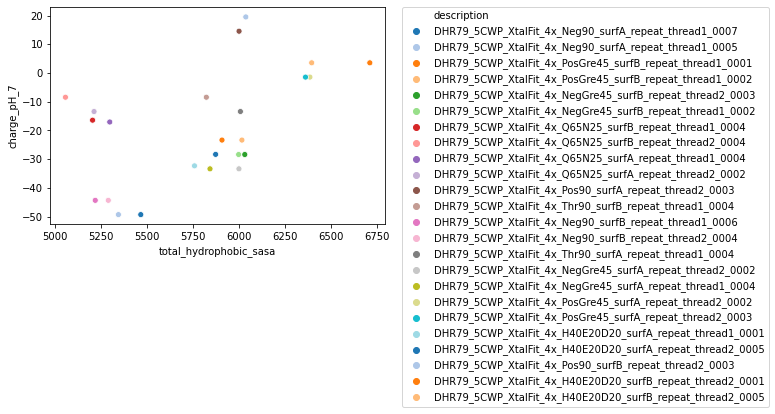

In [40]:
#isoelectric_point #charge_pH_7 #SAP_score #res_norm_SAP
g = sns.scatterplot(x="total_hydrophobic_sasa", y="charge_pH_7",
              hue="description",
              data=df_scaffold,
              palette='tab20')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.set(rc = {'figure.figsize':(5,5)})